In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
use_gdrive = True

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


## Centering

In [3]:

def centering_data(data):
    images = data.iloc[:, :-1].values

    mean_image = np.mean(images, axis=0)
    centered_images = images - mean_image  # Centering the image

    return centered_images,  mean_image

## PCA

In [4]:
def apply_PCA(centered_images, treshold):
    pca = PCA()
    pca.fit(centered_images)
    explained_variance_ratio = pca.explained_variance_ratio_

    cumulative_variance = np.cumsum(explained_variance_ratio) * 100
    n_component = np.argmax(cumulative_variance >= treshold) + 1
    print(n_component)
    # Plotting
    plt.ylabel('% Variance Explained')
    plt.xlabel('# of Features')
    plt.title('PCA Variance Explained')
    plt.ylim(0, 110)
    plt.axhline(y=treshold, color='r', linestyle='--')
    plt.plot(cumulative_variance)
    plt.show()

    X_reduced = (PCA(n_components=n_component)).fit_transform(centered_images)
    print(X_reduced.shape)
    X_reduced_df = pd.DataFrame(X_reduced)
    return X_reduced_df




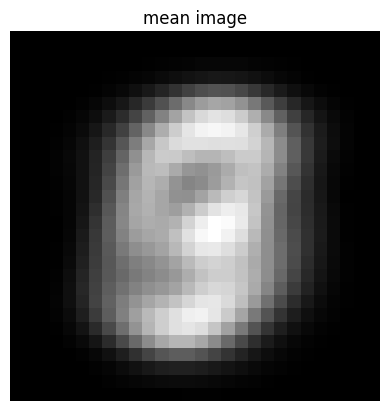

17


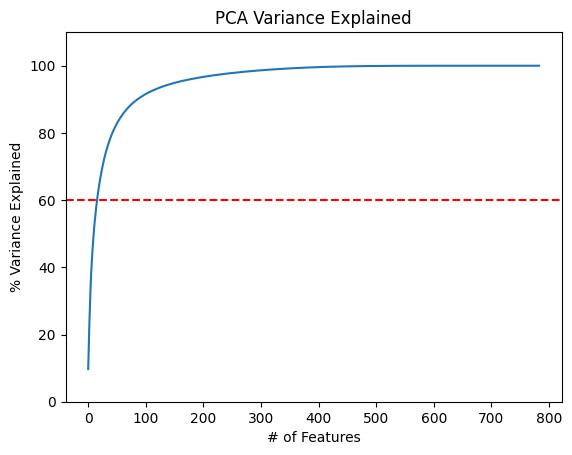

(70000, 17)
40


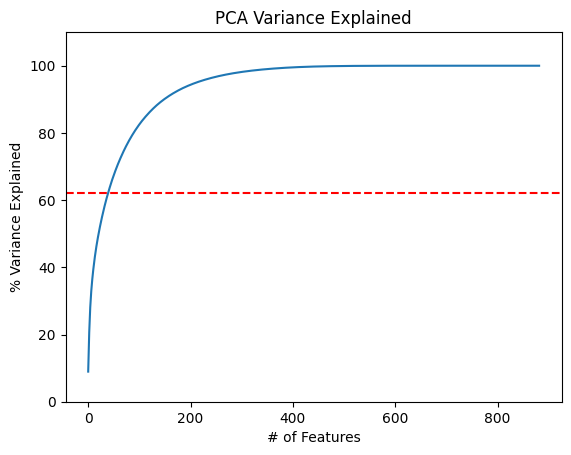

(70000, 40)


In [7]:

path = "./"
if use_gdrive:
    path = "/content/gdrive/MyDrive/ML/project2/"

# Step 1: Read the MNIST dataset from CSV
raw_data = pd.read_csv(f'{path}raw.csv')
sob_hog = pd.read_csv(f'{path}sobel_hog.csv')
labels = raw_data.iloc[:, -1].values

raw_centered_images, raw_mean_image = centering_data(raw_data)
sob_hog_centered_images, _ = centering_data(sob_hog)

#plot mean image
image_array = raw_mean_image.reshape(28, 28)
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.title('mean image')
plt.show()

X_reduced_raw = apply_PCA(raw_centered_images, 62)
X_reduced_raw['label'] = labels
X_reduced_raw.to_csv(f'{path}raw_reduced.csv', index=False)

X_reduced_soho = apply_PCA(sob_hog_centered_images, 62)
X_reduced_soho['label'] = labels
X_reduced_soho.to_csv(f'{path}sob_hog_reduced.csv', index=False)